In [1]:
# Refer Luke's note for understanding the basics, we are going to start with the problems
# https://github.com/Tushar-Mozare/Lukes_Python_Course/blob/main/1_Basics/28_Matplotlib_Intro.ipynb
# https://github.com/Tushar-Mozare/Lukes_Python_Course/blob/main/1_Basics/29_Matplotlib_Plotting.ipynb
# https://github.com/Tushar-Mozare/Lukes_Python_Course/blob/main/1_Basics/30_Matplotlib_Labeling.ipynb
# https://github.com/Tushar-Mozare/Lukes_Python_Course/blob/main/1_Basics/31_Matplotlib_Pandas_Plotting.ipynb

In [2]:
# Now our first task is to create a line chart using matplotlib for number of job posting data by month.
# So for that first we import data and export to it to dataframe "df" and also we need pandas, numpy, matplotlib libraries.

In [3]:
%pip install datasets

from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = load_dataset("lukebarousse/data_jobs")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
df = data["train"].to_pandas()

In [6]:
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [7]:
# Now we want a column which represent in which month job posting occurs
# So we will see if such column exist.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [9]:
# No colomn representing in which month job posting occurs exists, So we have to create it.
# So for that we take the help of column job_posted_date
# But if we observe carefully column job_posted_date is not in datetime( i.e. in correct datatype) datatype.
# So first we have to do that.

In [10]:
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [12]:
# Done.
# Lets check if there is any none or NaN value in job_posted_date

In [13]:
df.job_posted_date.isna().any()

False

In [14]:
# Okay there is no missing data
# Cool, Now lets create the column representing months as job_posted_month

In [15]:
df["job_posted_month"] = df["job_posted_date"].dt.month

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [17]:
# Now lets find how many job posting occurs in individual month

In [18]:
job_count_month = df["job_posted_month"].value_counts()

job_count_month

,count
job_posted_month,
1,91822
8,75162
10,66611
2,64578
11,64450
3,64084
7,63777
4,62919
9,62359


In [19]:
# Lets plot it.

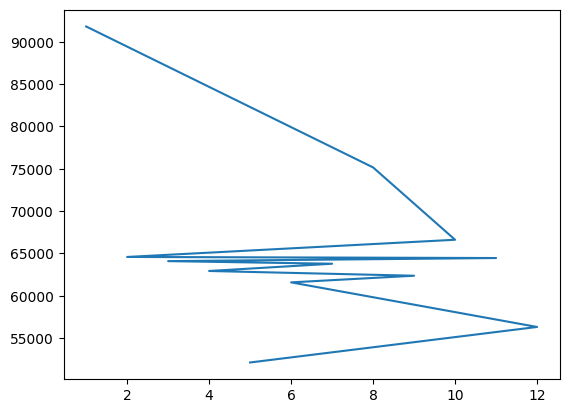

In [20]:
plt.plot(job_count_month.index, job_count_month)
plt.show()

In [21]:
# Woopsie!
# Note :
#   matplotlib does not sort the value provided that's why the graph messed up.

# Okay then lets arrange the data.

# Note :
#   job_count_month is a Series. So we can do all the series operation on it
#   For more info on series, refer Luke's attached documents

In [22]:
job_count_month = job_count_month.sort_index(ascending=True, inplace = False)

job_count_month

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


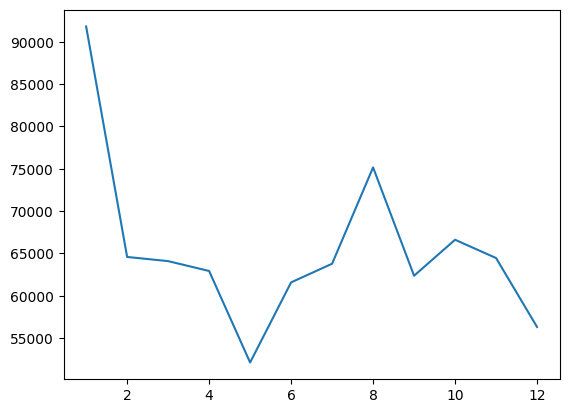

In [23]:
plt.plot(job_count_month.index, job_count_month)
plt.show()

In [24]:
# Lets do the second Activity.
# In this we want to plot a bar graph representing the number of job posting per job title.

In [25]:
# For this again we need how many entries do each unique values in job_title_short have
# First let check job_title_short column is clean or not

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [27]:
df["job_title_short"].isna().any()

False

In [28]:
# Okay job_title_short is in correct datatype and have no missing values
# Great lets move forward.

In [29]:
job_count_title = df["job_title_short"].value_counts()

job_count_title

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


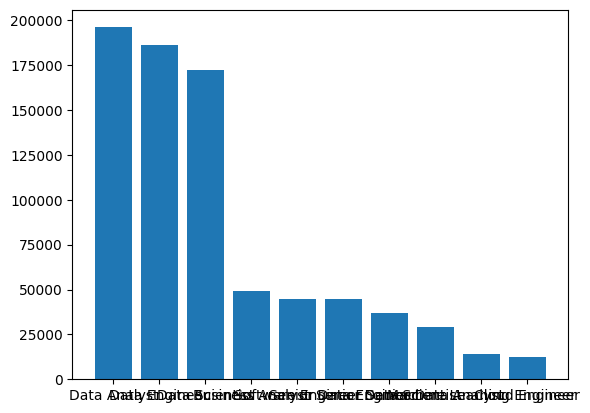

In [30]:
plt.bar(job_count_title.index, job_count_title)
plt.show()

In [31]:
# Okay we got our bar chart but job title are pretty messed up
# We need to fix it but how?
# If the job title are tiled 45 degree then it solve the problem [Hopefully :)]
# So how to do that
# Well have the look below :

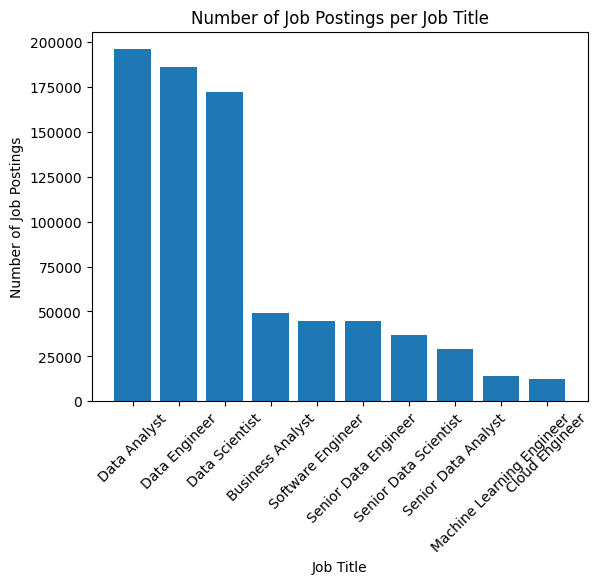

In [32]:
plt.bar(job_count_title.index, job_count_title)
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Job Postings per Job Title")
plt.xticks(rotation=45)
plt.show()

In [33]:
# This adding addditional info in the code for customising chart is called LABELLING
# But we got another problem if you see the hob title are not properly alinged with ticks
# So for that follow the below code

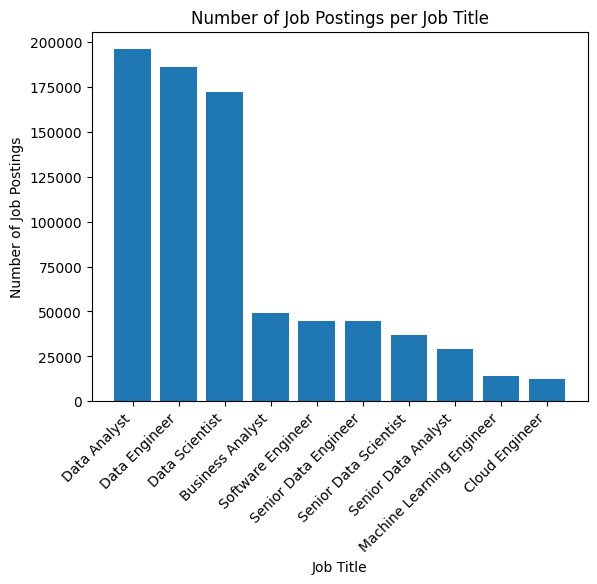

In [34]:
plt.bar(job_count_title.index, job_count_title)
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Job Postings per Job Title")
plt.xticks(rotation = 45, ha = "right")
plt.show()

In [35]:
# for matplotlib.pyplot.xticks(rotation = int, ha = "center")
# That's why in first case job titles are aligned center wrt tick causing inproper alignment.

In [36]:
# Let plot the horizontal bar graph.

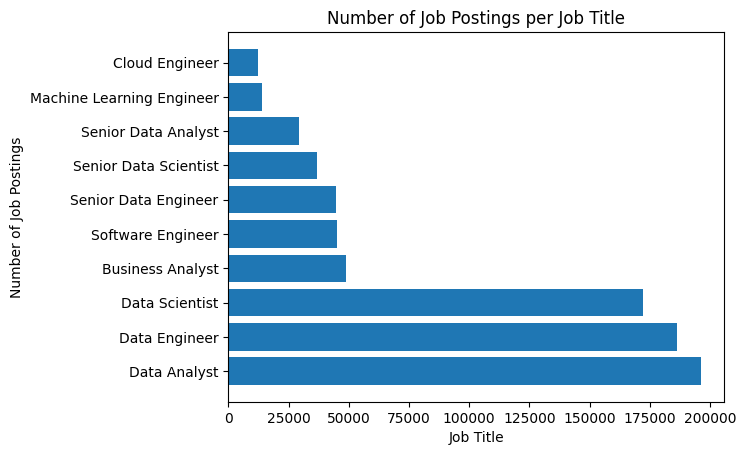

In [37]:
plt.barh(job_count_title.index, job_count_title)
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Job Postings per Job Title")
plt.show()

In [38]:
# Let plot the horizontal bar graph where most job posting's job title at top.

In [39]:
job_count_title_asc = job_count_title.sort_values(ascending = True)

job_count_title_asc

,count
job_title_short,
Cloud Engineer,12331
Machine Learning Engineer,14080
Senior Data Analyst,29216
Senior Data Scientist,36957
Senior Data Engineer,44563
Software Engineer,44929
Business Analyst,49063
Data Scientist,172286
Data Engineer,186241


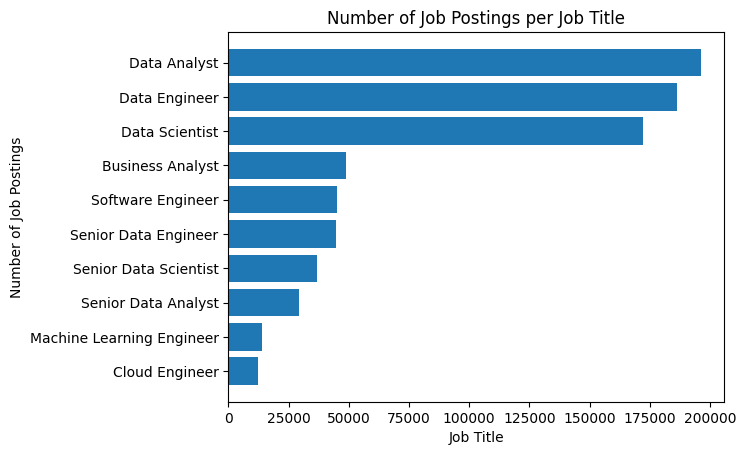

In [40]:
plt.barh(job_count_title_asc.index, job_count_title_asc)
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Job Postings per Job Title")
plt.show()

In [41]:
# Actually you can use pandas library too for ploting the graph
# Here lemme show you.

In [42]:
job_count_title

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


<Axes: xlabel='job_title_short'>

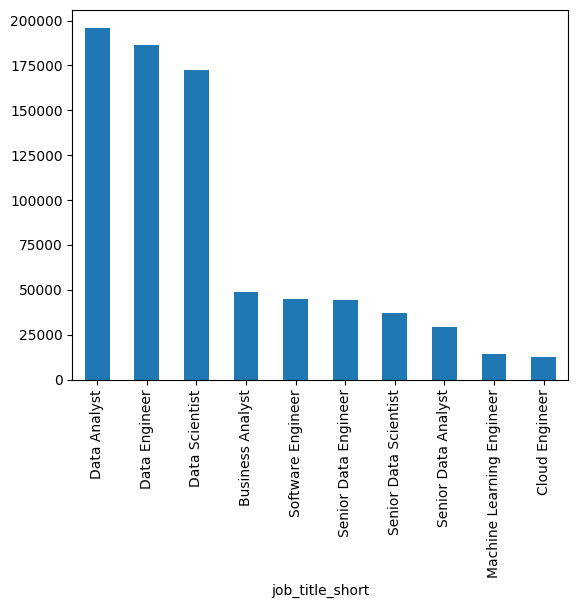

In [43]:
job_count_title.plot(kind = "bar")

In [44]:
# See job_count_title is a Series thus you don't have to specify x and y
# It will assume x = Index and y = Values until specified
# Syntax : Series.plot(x = "Series.Index", y = "Series.values", kind = str)
#        : Dataframe.plot(x = str, y = str, kind = str)
# kind contain types of graphs like bar graph, line graph
# Lemme clear with some modification in prev code

<Axes: xlabel='job_title_short'>

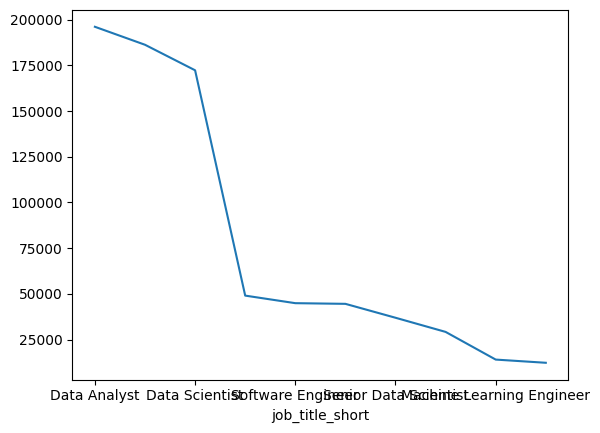

In [45]:
job_count_title.plot( kind = "line")

In [46]:
# Okay fine but if I want to do custmization in the graph then what?
# See in backend pandas library use matplotlib itself for ploting graphs
# So you can handle Dataframe.plot() OR Series.plot() functions of pandas library as it is of matplotlib and do further coding as it is of matplotlib
# Lemme show you.

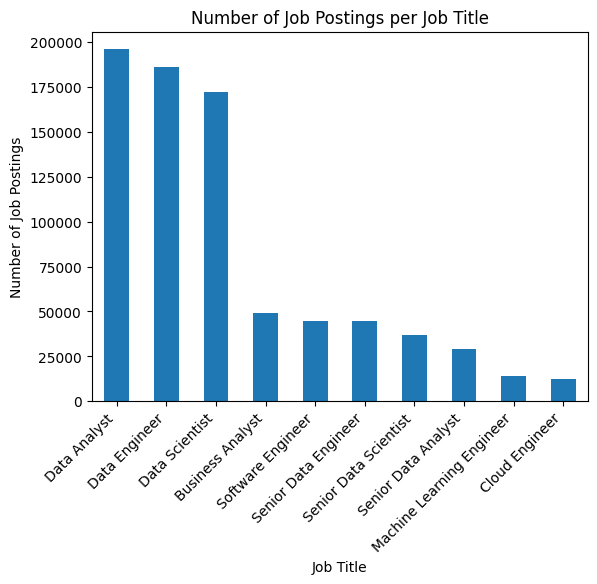

In [47]:
job_count_title.plot(kind = "bar")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Job Postings per Job Title")
plt.xticks(rotation = 45, ha = "right")
plt.show()